In [ ]:
import tensorflow as tf
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from keras.utils import np_utils
import torch
import torch.nn as nn
import torchvision
import torch
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#Installation package Kaggle
! pip install -q kaggle

In [ ]:
# Création d'un fichier Kaggle
!mkdir ~/.kaggle/

In [ ]:
# Copier Kaggle.json dans le dossier Kaggle crée avant
! cp '/content/drive/MyDrive/Kaggle/kaggle.json' ~/.kaggle/

In [ ]:
# Donner les drtoits à Kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download dataset
! kaggle datasets download -d deadskull7/fer2013

 98% 95.0M/96.6M [00:02<00:00, 43.5MB/s]
100% 96.6M/96.6M [00:02<00:00, 34.2MB/s]


In [ ]:
# Unzip dataset
! unzip /content/fer2013.zip

Archive:  /content/fer2013.zip
  inflating: fer2013.csv             


In [ ]:
print('Tensorflow version: {}'.format(tf.__version__) )

Tensorflow version: 2.11.0


In [ ]:
# Data sampling and pre-processing
# Show fer2013.csv
data = pandas.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
# Show samples distribution across different sample sets
print('Samples distribution across Usage:')
print(data.Usage.value_counts())

Samples distribution across Usage:
Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [ ]:
# How much Samples per emotion
print('Samples per emotion:')
print(data.emotion.value_counts())

Samples per emotion:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


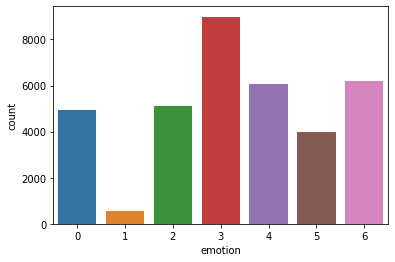

In [ ]:
# Graph of How much Samples per emotion
sns.countplot(data.emotion)
plt.show()

In [ ]:
# Number of pixels for each sample
print('Number of pixels for a sample:')
print(len(data.pixels[0].split(' ')))

Number of pixels for a sample:
2304


In [ ]:
# Split the dataset into training, validation and test sets depending on the Usage value for the samples
data_train = data[data.Usage =='Training'].reset_index(drop=True) 
data_val = data[data.Usage =='PrivateTest'].reset_index(drop=True) 
data_test = data[data.Usage =='PublicTest'].reset_index(drop=True) 

print(data_train.shape,data_val.shape,data_test.shape)

(28709, 3) (3589, 3) (3589, 3)


In [ ]:
print(data_test)

      emotion                                             pixels       Usage
0           0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...  PublicTest
1           1  156 184 198 202 204 207 210 212 213 214 215 21...  PublicTest
2           4  69 118 61 60 96 121 103 87 103 88 70 90 115 12...  PublicTest
3           6  205 203 236 157 83 158 120 116 94 86 155 180 2...  PublicTest
4           3  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...  PublicTest
...       ...                                                ...         ...
3584        4  178 176 172 173 173 174 176 173 166 166 206 22...  PublicTest
3585        3  25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...  PublicTest
3586        4  255 255 255 255 255 255 255 255 255 255 255 25...  PublicTest
3587        4  33 25 31 36 36 42 69 103 132 163 175 183 187 1...  PublicTest
3588        4  61 63 59 75 151 159 166 161 143 170 127 131 18...  PublicTest

[3589 rows x 3 columns]


In [ ]:
# Show the train_set
data_train

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [ ]:
# Show the validation_set
data_val

,emotion,pixels,Usage
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
4,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest
...,...,...,...
3584,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
3585,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
3586,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
3587,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
# Show the test_set
data_test

,emotion,pixels,Usage
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
...,...,...,...
3584,4,178 176 172 173 173 174 176 173 166 166 206 22...,PublicTest
3585,3,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...,PublicTest
3586,4,255 255 255 255 255 255 255 255 255 255 255 25...,PublicTest
3587,4,33 25 31 36 36 42 69 103 132 163 175 183 187 1...,PublicTest


In [ ]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_labels)
num_classes

7

In [ ]:
class FER2013(torch.utils.data.Dataset):
    def __init__(self, data, transforms=None):
        self.data = data
        self.transforms = transforms

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row = self.data.loc[index]
        image, label = np.array([x.split() for x in self.data.loc[index, ['pixels']]]), row['emotion']
        image = np.asarray(image).astype(np.uint8).reshape(48, 48, 1)

        if self.transforms:
            image = self.transforms(image)

        return image, label

In [ ]:
trfm_train = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToPILImage(),
        torchvision.transforms.Grayscale(num_output_channels=1),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5), (0.5))
    ])
trfm_val_test = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToPILImage(),
        torchvision.transforms.Grayscale(num_output_channels=1),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5), (0.5))
    ])

data_train = FER2013(data_train, trfm_train)
data_val = FER2013(data_val, trfm_val_test)
data_test = FER2013(data_test, trfm_val_test)

data_train[0]

(tensor([[[-0.4510, -0.3725, -0.3569,  ..., -0.5922, -0.6627, -0.6784],
          [-0.4902, -0.5216, -0.5451,  ..., -0.5608, -0.5922, -0.6549],
          [-0.6078, -0.6627, -0.5765,  ..., -0.6157, -0.5608, -0.6314],
          ...,
          [-0.2863, -0.4902, -0.6706,  ..., -0.4353, -0.5608, -0.6627],
          [-0.3961, -0.3569, -0.3804,  ..., -0.1765, -0.4510, -0.6392],
          [-0.3961, -0.4353, -0.3412,  ..., -0.1686, -0.1451, -0.3569]]]), 0)

In [ ]:
batch_size = 128

loader_train = torch.utils.data.DataLoader(data_train, batch_size,
shuffle=True, pin_memory=True)
loader_val = torch.utils.data.DataLoader(data_val, batch_size, pin_memory=True)
loader_test = torch.utils.data.DataLoader(data_test, batch_size, pin_memory=True)

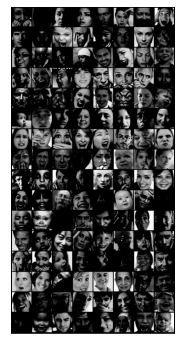

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(torchvision.utils.make_grid(images, nrow=8).permute(1, 2, 0))
        break

show_batch(loader_train)

In [ ]:
class Model_base(torch.nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        images = images.to(device)
        labels = labels.to(device)
        out = self(images)                 
        loss = torch.nn.functional.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        images = images.to(device)
        labels = labels.to(device)
        out = self(images)                    
        loss = torch.nn.functional.cross_entropy(out, labels)   
        acc = accuracy(out, labels)         
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()     
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_chnl, out_chnl, padding=1):
    layers = [
        torch.nn.Conv2d(in_chnl, out_chnl, kernel_size=3, padding=padding, stride=1),
        torch.nn.ReLU(),
        torch.nn.BatchNorm2d(out_chnl),
        torch.nn.MaxPool2d(2),
        torch.nn.Dropout(0.4)]
    return torch.nn.Sequential(*layers)

class Model(Model_base):
   def __init__(self, in_chnls, num_cls):
        super().__init__()
        
        self.conv1 = torch.nn.Conv2d(in_chnls, 256, kernel_size=3, padding=1) # 256x48x48
        self.block1 = conv_block(256, 512)           # 512x24x24 
        self.block2 = conv_block(512, 384)                # 384x12x12       
        self.block3 = conv_block(384, 192)       # 192x6x6 
        self.block4 = conv_block(192, 384)       # 384x3x3
    
        self.classifier = torch.nn.Sequential(torch.nn.Flatten(),
                                        torch.nn.Linear(3456, 256),
                                        torch.nn.ReLU(),
                                        torch.nn.BatchNorm1d(256),
                                        torch.nn.Dropout(0.3),
                                        torch.nn.Linear(256, num_cls))    
   def forward(self, xb):
        out = self.conv1(xb)
        out = self.block1(out)
        out = self.block2(out)       
        out = self.block3(out)
        out = self.block4(out)
        
        return self.classifier(out)

In [ ]:
from pickle import TRUE
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, loader_train, loader_val, opt_func, verbose=True):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in loader_train:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, loader_val)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

        # Print verbose
        if verbose:
            print(f"Epoch [{epoch+1}/{epochs}], train_loss: {result['train_loss']:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")
    return history

In [ ]:

model = Model(1,7).to(device) 
optimizer = torch.optim.Adam
lr=0.001
num_epochs=20
# Afficher le summary du modèle
summary(model, (1, 48, 48))
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 48, 48]           2,560
            Conv2d-2          [-1, 512, 48, 48]       1,180,160
              ReLU-3          [-1, 512, 48, 48]               0
       BatchNorm2d-4          [-1, 512, 48, 48]           1,024
         MaxPool2d-5          [-1, 512, 24, 24]               0
           Dropout-6          [-1, 512, 24, 24]               0
            Conv2d-7          [-1, 384, 24, 24]       1,769,856
              ReLU-8          [-1, 384, 24, 24]               0
       BatchNorm2d-9          [-1, 384, 24, 24]             768
        MaxPool2d-10          [-1, 384, 12, 12]               0
          Dropout-11          [-1, 384, 12, 12]               0
           Conv2d-12          [-1, 192, 12, 12]         663,744
             ReLU-13          [-1, 192, 12, 12]               0
      BatchNorm2d-14          [-1, 192,

In [ ]:
history = fit(num_epochs, lr, model, loader_train, loader_val, optimizer, verbose=True)

Epoch [0], train_loss: 1.7729, val_loss: 1.5975, val_acc: 0.3912
Epoch [1/20], train_loss: 1.7729, val_loss: 1.5975, val_acc: 0.3912
Epoch [1], train_loss: 1.4668, val_loss: 1.4656, val_acc: 0.4777
Epoch [2/20], train_loss: 1.4668, val_loss: 1.4656, val_acc: 0.4777
Epoch [2], train_loss: 1.3112, val_loss: 1.1973, val_acc: 0.5388
Epoch [3/20], train_loss: 1.3112, val_loss: 1.1973, val_acc: 0.5388
Epoch [3], train_loss: 1.2092, val_loss: 1.1634, val_acc: 0.5633
Epoch [4/20], train_loss: 1.2092, val_loss: 1.1634, val_acc: 0.5633
Epoch [4], train_loss: 1.1624, val_loss: 1.1317, val_acc: 0.5682
Epoch [5/20], train_loss: 1.1624, val_loss: 1.1317, val_acc: 0.5682
Epoch [5], train_loss: 1.1144, val_loss: 1.1298, val_acc: 0.5822
Epoch [6/20], train_loss: 1.1144, val_loss: 1.1298, val_acc: 0.5822
Epoch [6], train_loss: 1.0737, val_loss: 1.0128, val_acc: 0.6120
Epoch [7/20], train_loss: 1.0737, val_loss: 1.0128, val_acc: 0.6120
Epoch [7], train_loss: 1.0414, val_loss: 1.0034, val_acc: 0.6140
Epoc

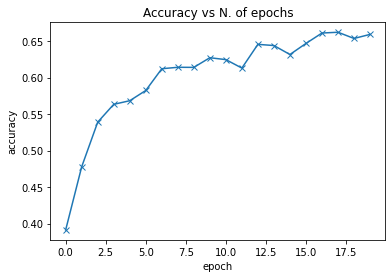

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs N. of epochs');

plot_accuracies(history)

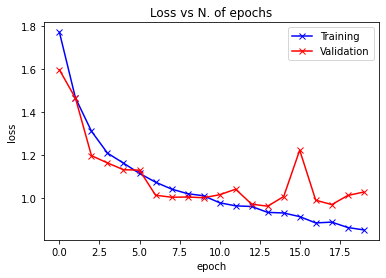

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs N. of epochs');

plot_losses(history)

In [ ]:
evaluate(model, loader_test)

{'val_loss': 1.0438700914382935, 'val_acc': 0.6392241716384888}

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0).to(device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

img, label = data_test[100] 
predict_image(img,model)
label

3

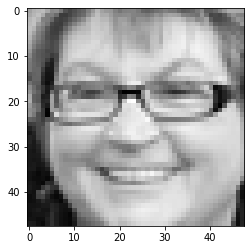

In [ ]:
plt.imshow(img.squeeze(), cmap='gray')

In [ ]:
#torch.save(model.state_dict(), './fer2013_pyorch.h5')
torch.save(model.state_dict(), './fer2013_pytorch.pt')
